<a href="https://colab.research.google.com/github/Azeezmariam/data_preprocessing/blob/main/ml_pipeline_Mariam_Temilola_Aazeez_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: Language Text Classification For East African Tourism

## ## 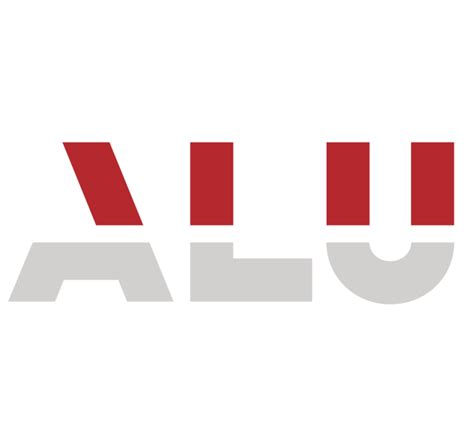



## Student Name: Mariam Temilola Azeez

---

1. **Data Sources and Aggregation:**
- List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)
   Data Sources:

MMTAfrica: Multilingual Machine Translation for African Languages -
https://paperswithcode.com/paper/mmtafrica-multilingual-machine-translation-1

Masakhane is a grassroots NLP community for Africa, by Africans with a mission to strengthen and spur NLP research in African languages - https://github.com/masakhane-io/masakhane-ner?ref=hackernoon.com
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   Data Aggregation:
Data aggregation is crucial for African NLP due to linguistic diversity, resource scarcity, and contextual variability. Combining datasets like MMTAfrica and Masakhane ensures comprehensive representation, improves generalization, and addresses unique challenges in multilingual analysis.









In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#insert code if necessary

import pandas as pd
import numpy as np
# Load the two stratified parts
stratified_part1 = pd.read_csv('/content/drive/MyDrive/pipeline/EACLanguageDetection_Stratified_Part1.csv')
stratified_part2 = pd.read_csv('/content/drive/MyDrive/pipeline/EACLanguageDetection_Stratified_Part2.csv')

# Combine the two datasets
aggregated_data = pd.concat([stratified_part1, stratified_part2]).drop_duplicates()

# Save the aggregated dataset
aggregated_file_path = '/content/drive/MyDrive/EACLanguageDetection_Aggregated.csv'
aggregated_data.to_csv(aggregated_file_path, index=False)

aggregated_file_path


'/content/drive/MyDrive/EACLanguageDetection_Aggregated.csv'



2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 The current data is in CSV format, containing text data and corresponding language labels. It is structured into rows with columns for linguistic content and classification categories.  

 The planned transformation involves:  
- Cleaning and tokenizing text data.  
- Normalizing language labels for consistency.  
- Handling missing or duplicate entries.  
- Encoding categorical labels numerically.  
- Saving the processed data in a CSV or Parquet format for analysis.  


   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
   
  **Exploratory Data Analysis (EDA) Findings**  

- **Distributions**: Language labels are imbalanced, with some languages significantly underrepresented. Text lengths vary widely, with most falling within a specific range.  
- **Correlations**: No strong correlations observed between text length and language labels. However, patterns emerge linking specific text characteristics to languages.  
- **Outliers**: Detected unusually short or long texts, potential encoding errors, and mislabeled entries. These require further review or removal to avoid skewing the analysis.considered based on modeling needs.
   
  **Insert code for data exploration below**


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      3971 non-null   object
 1   Language  3971 non-null   object
dtypes: object(2)
memory usage: 62.2+ KB
None

Missing Values:
Text        0
Language    0
dtype: int64

Language Label Distribution:
Language
English        1382
Kinyarwanda    1017
French         1007
Kiswahili       565
Name: count, dtype: int64


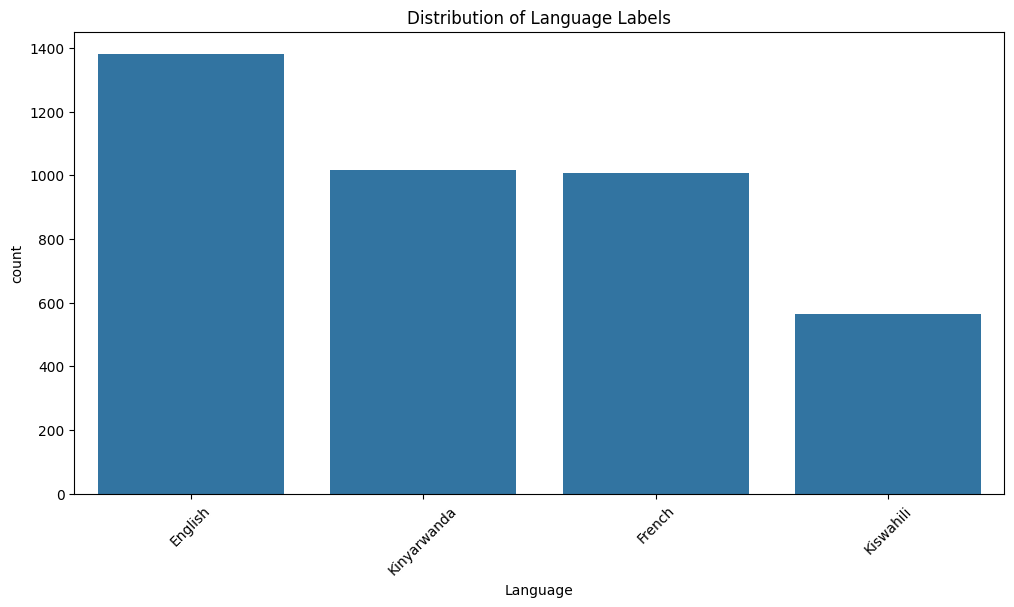


Text Length Statistics:
count    3971.000000
mean      125.833040
std        84.877387
min         2.000000
25%        72.500000
50%       104.000000
75%       165.500000
max      1168.000000
Name: Text_Length, dtype: float64


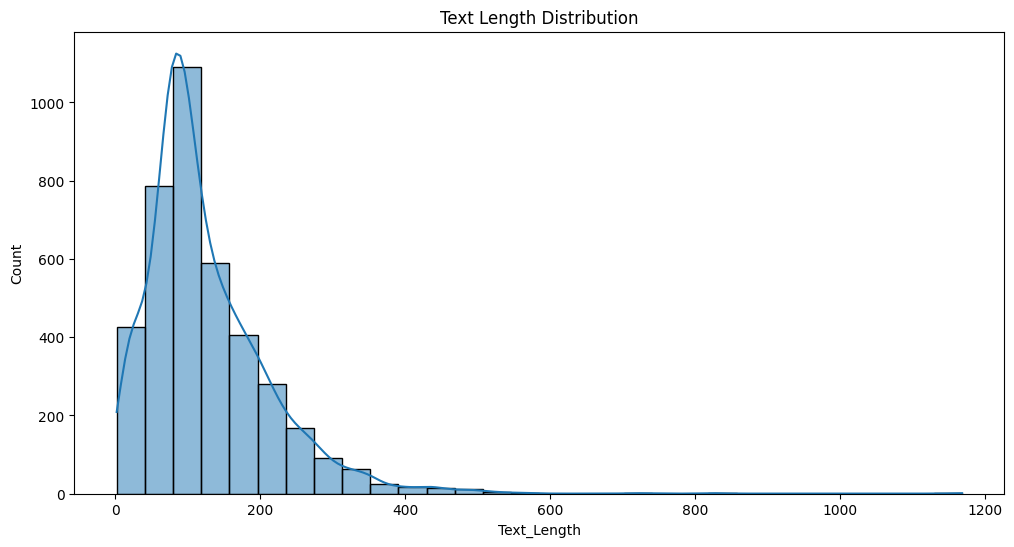


Number of Outliers in Text Length: 150


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/EACLanguageDetection_Aggregated.csv')

# General information
print("Dataset Overview:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Distribution of language labels
print("\nLanguage Label Distribution:")
print(data['Language'].value_counts())

# Plot language label distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Language', order=data['Language'].value_counts().index)
plt.title("Distribution of Language Labels")
plt.xticks(rotation=45)
plt.show()

# Text length distribution
data['Text_Length'] = data['Text'].apply(len)
print("\nText Length Statistics:")
print(data['Text_Length'].describe())

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Text_Length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()

# Identify outliers in text length
q1 = data['Text_Length'].quantile(0.25)
q3 = data['Text_Length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['Text_Length'] < lower_bound) | (data['Text_Length'] > upper_bound)]
print(f"\nNumber of Outliers in Text Length: {len(outliers)}")





4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.
   
### Preexisting Hypotheses

. **Language Distribution**:
   - The dataset has an imbalanced distribution of language classes, with certain languages (e.g., English) being more prevalent than others.

. **Text Characteristics**:
   - Text length and vocabulary usage differ significantly between languages.

### Methodologies

. **Language Distribution**: Analyze label frequencies using bar plots or Gini coefficient for imbalance.

. **Text Characteristics**: Compare text lengths with boxplots; use ANOVA or Kruskal-Wallis for significance.

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers
### Assessing Data Density

. **Data Sparsity**:
   - **Check Missing Values**: Verify if any columns or rows have null or empty values.
   - **Text Characteristics**: Assess text lengths; extremely short texts might indicate sparsity in information.

. **Density Metrics**:
   - **Average Word Count**: Compute mean/median text length.
   - **Text Coverage**: Evaluate token uniqueness and repetition within each language.

. **Outliers**:
   - Use boxplots or interquartile range (IQR) to detect unusually long or short text samples.  

### Strategies

. **Missing Data**:
   - Remove rows with null values (if minimal).
   - Impute missing text with placeholders (e.g., "Unknown").

. **Outliers**:
   - Cap text lengths using the IQR method.
   - Exclude excessively short or long samples if they hinder model performance.

**Insert code for Handling Sparse/Dense Data and Outliers below**

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

   **Data Splitting Methodology**:

Use an 80-10-10 split for training, validation, and testing sets. Apply stratified sampling based on language labels to maintain class balance across subsets.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Bias Mitigation**:

. **Identify Bias**: Analyze class distributions for imbalance and examine text length diversity.
. **Mitigate Bias**: Use oversampling or undersampling to balance classes and enforce equitable text length ranges.
. **Fairness Review**: Periodically reassess to ensure unbiased representation.



In [10]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/EACLanguageDetection_Aggregated.csv'
data = pd.read_csv(file_path)
print("Dataset loaded successfully. First few rows:")
print(data.head())

# Calculate text lengths
data['Text_Length'] = data['Text'].apply(len)
print("\nText lengths calculated. Distribution of text lengths:")
print(data['Text_Length'].describe())

# Detect outliers using the IQR method
Q1 = data['Text_Length'].quantile(0.25)
Q3 = data['Text_Length'].quantile(0.75)
IQR = Q3 - Q1

print("\nInterquartile Range (IQR) calculated:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Define lower and upper bounds for text lengths
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nLower bound: {lower_bound}, Upper bound: {upper_bound}")

# Identify outliers
outliers = data[(data['Text_Length'] < lower_bound) |
                (data['Text_Length'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")
print(outliers.head())

# Handle outliers by capping text lengths
data['Capped_Text'] = data['Text_Length'].clip(lower=lower_bound, upper=upper_bound)
print("\nOutliers handled by capping text lengths. Updated dataset:")
print(data[['Text', 'Text_Length', 'Capped_Text']].head())


Dataset loaded successfully. First few rows:
                                                Text     Language
0   kwishyuza abantu kugira ngo ubahanurire ni uk...  Kinyarwanda
1  Il nous faut « reconnaître à qui et à quoi nou...       French
2                             oh, c'est presque fou.       French
3  There was a decline of about two billion betwe...      English
4  ou les affaires ont été lentes ce trimestre, v...       French

Text lengths calculated. Distribution of text lengths:
count    3971.000000
mean      125.833040
std        84.877387
min         2.000000
25%        72.500000
50%       104.000000
75%       165.500000
max      1168.000000
Name: Text_Length, dtype: float64

Interquartile Range (IQR) calculated:
Q1: 72.5, Q3: 165.5, IQR: 93.0

Lower bound: -67.0, Upper bound: 305.0

Number of outliers detected: 150
                                                  Text   Language  Text_Length
18   L'histoire des sciences naturelles montre que ...     French          316

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.
  
- **Text Data:** Input sequences for language classification.  
- **Text Length:** Numeric feature indicating sequence length.  
- **Character/Word Frequencies:** Frequency distribution for linguistic patterns.  
- **TF-IDF Vectors:** Represent text significance across the corpus.  
- **Language-Specific Embeddings:** Capturing semantic nuances.  
   
   **Feature Ranking for Project Objectives:**

1. **Language-Specific Embeddings:** High semantic value for accurate classification.  
2. **TF-IDF Vectors:** Highlights text significance across languages.  
3. **Character/Word Frequencies:** Captures unique linguistic patterns.  
4. **Text Data:** Core input for sequence processing.  
5. **Text Length:** Secondary feature aiding preprocessing and analysis.  
 **Your answer for features must be plotted/ show your working code-wise **

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

  **Types of Data Handling:**  
- **Text**: Categorical (raw textual data).  
- **Language Labels**: Categorical (class identifiers).  
- **Text Length**: Numerical (integer values).  

**Preprocessing Steps for Each Data Type:**  

- **Text (Categorical)**:  
  - Tokenization  
  - Lowercasing  
  - Remove punctuation and special characters  
  - Stopword removal (if applicable)  

- **Language Labels (Categorical)**:  
  - Encode as integers or one-hot vectors  

- **Text Length (Numerical)**:  
  - Normalize or scale (if used as a feature)  
  - Handle outliers using capping or exclusion  

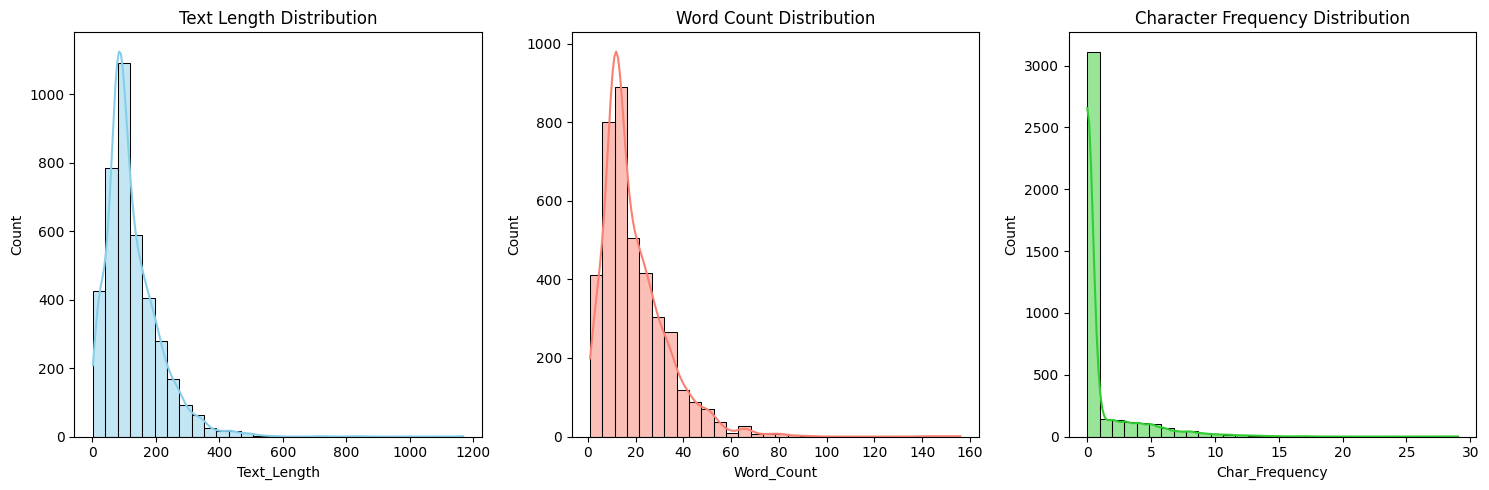

In [9]:
#print out relevant features
# Calculate text length and word count for each text sample
data['Text_Length'] = data['Text'].apply(len)
data['Word_Count'] = data['Text'].apply(lambda x: len(x.split()))

# Example character frequency calculation (adjust char_list as needed)
def calculate_char_frequency(text, char_list):
    return sum(text.count(char) for char in char_list)

accent_chars = ['é', 'è', 'à', 'ñ', 'ç']  # example set
data['Char_Frequency'] = data['Text'].apply(lambda x: calculate_char_frequency(x, accent_chars))

# Plot distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Text_Length'], bins=30, color='skyblue', kde=True)
plt.title('Text Length Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Word_Count'], bins=30, color='salmon', kde=True)
plt.title('Word Count Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['Char_Frequency'], bins=30, color='limegreen', kde=True)
plt.title('Character Frequency Distribution')

plt.tight_layout()
plt.show()



10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

    **Data Transformation for Modeling**:

. **Text Data Transformation**: Convert text to lower case, remove punctuation, and vectorize using TF-IDF or word embeddings.

. **Numerical Features**: Apply standard scaling (e.g., StandardScaler) to normalize text length, word count, and character frequency.

. **Categorical Encoding**: Encode language labels with one-hot encoding or label encoding to create model-friendly numerical representations.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

    **Data Storage**:

. **Storage Location**: Store processed data in a secure cloud database (e.g., AWS S3, Google Cloud Storage) for scalability and accessibility.

. **Data Format**: Save data in a structured format (e.g., Parquet or CSV) for efficient storage and retrieval.

. **Access Control**: Implement role-based permissions to restrict access, ensuring data privacy.

. **Version Control**: Store dataset versions for traceability and reproducibility in model training.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.